# Classifying IMDB Movies Reivews

## Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from keras.datasets import imdb

(train_data, train_labels) ,(test_data, test_labels) = imdb.load_data(num_words = 10000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Preparing the data

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
max(max(sequence) for sequence in train_data)

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
# Vectorizing the data as binary values
def vectorize_sequences(sequences,dimensions = 10000):
  results = np.zeros((len(sequences),dimensions))
  for i ,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

## Building the neural network

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [14]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Fitting the Model

In [15]:
history = model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4976 - accuracy: 0.7863 - val_loss: 0.3637 - val_accuracy: 0.8741
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2879 - accuracy: 0.9036 - val_loss: 0.3067 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2125 - accuracy: 0.9295 - val_loss: 0.3547 - val_accuracy: 0.8535
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1635 - accuracy: 0.9475 - val_loss: 0.3067 - val_accuracy: 0.8772
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1325 - accuracy: 0.9567 - val_loss: 0.2927 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1062 - accuracy: 0.9680 - val_loss: 0.3029 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0880 - accuracy: 0.9747 - val_loss: 0.3206 - val_accuracy: 0.8841
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualizing the performance of the neural network

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

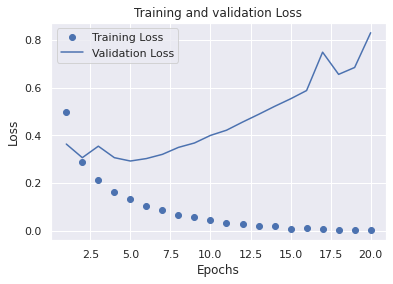

In [18]:
plt.plot(epochs, loss_values,'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b', label = 'Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

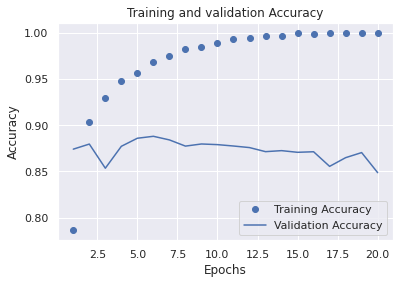

In [20]:
plt.plot(epochs, acc_values,'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values,'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Retraining A better model

In [21]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [22]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [23]:
history = model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4357 - accuracy: 0.8212
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2497 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1934 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.8818


In [24]:
results

[0.3016965687274933, 0.8817999958992004]

In [25]:
model.predict(x_test)

array([[0.19264674],
       [0.9999484 ],
       [0.92479616],
       ...,
       [0.14861226],
       [0.08676642],
       [0.7718599 ]], dtype=float32)